In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

- BeautifulSoup (bs4) is a Python library used for web scraping.


- BeautifulSoup (bs4) in Jupyter is used for parsing and navigating HTML or XML documents. It provides a convenient way to extract data from web pages by allowing users to search for and manipulate specific parts of the HTML content.

- now, we send request from our local pc to the website to get the HTML code

- There will be a class-name and there will be actual content inside every html tag, we can see it after inspection.

In [2]:
URL = "https://www.ambitionbox.com/reviews/larsen-and-toubro-limited-reviews"

- now, define http header

- for this we find our browser's user agent by going on website "https://www.whatismybrowser.com/detect/what-is-my-user-agent/"

In [3]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"

In [4]:
HEADER = ({'User-Agent':user_agent, 'Accept-Language' : 'en-US, en;q=0.5'})

- The part "'en-US, en;q=0.5'" is to tell amezon that we want everything in english

In [5]:
# now, we get web-page
webpage = requests.get(URL, headers=HEADER)

In [73]:
webpage

<Response [200]>

- The <Response [200]> shows that http request is successfull

b'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>\n    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>\n\n    <title>Larsen &amp; Toubro Limited Reviews by 16752 Employees 2024 | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2024 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hp
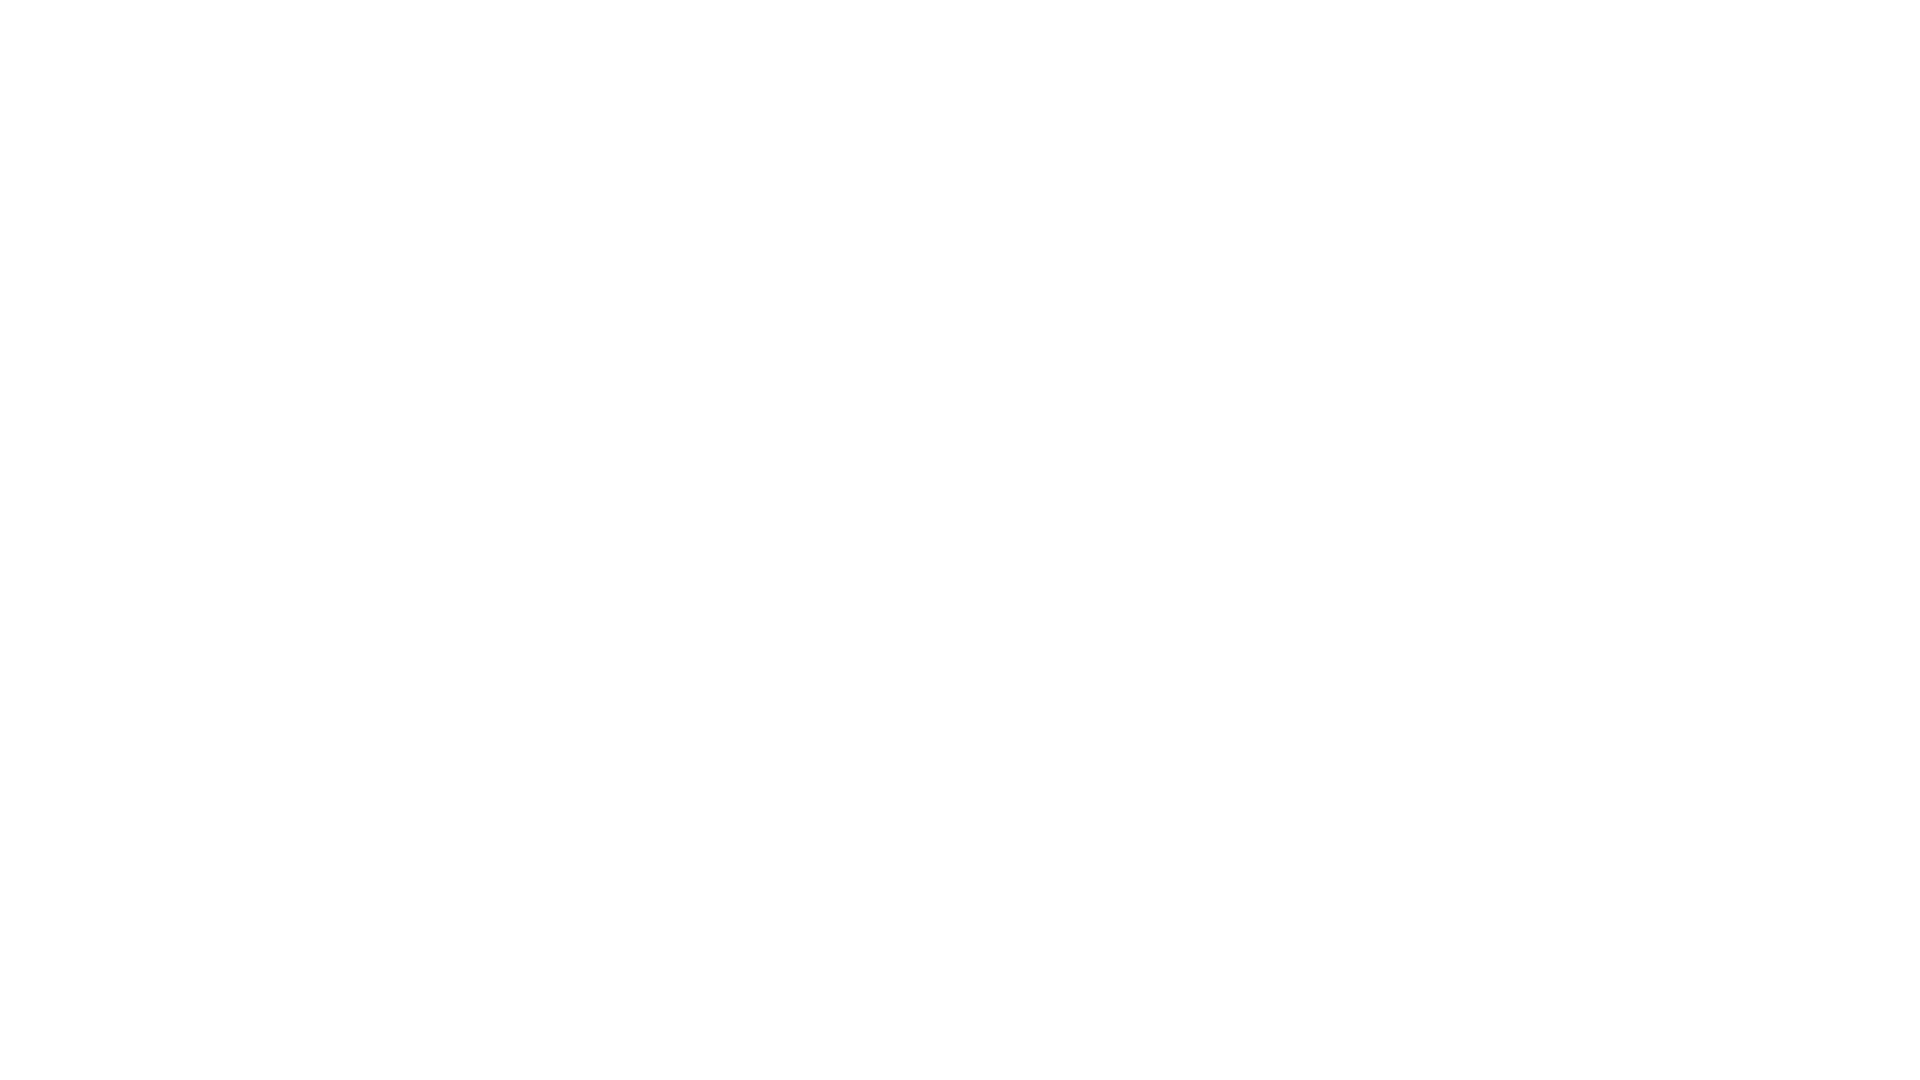
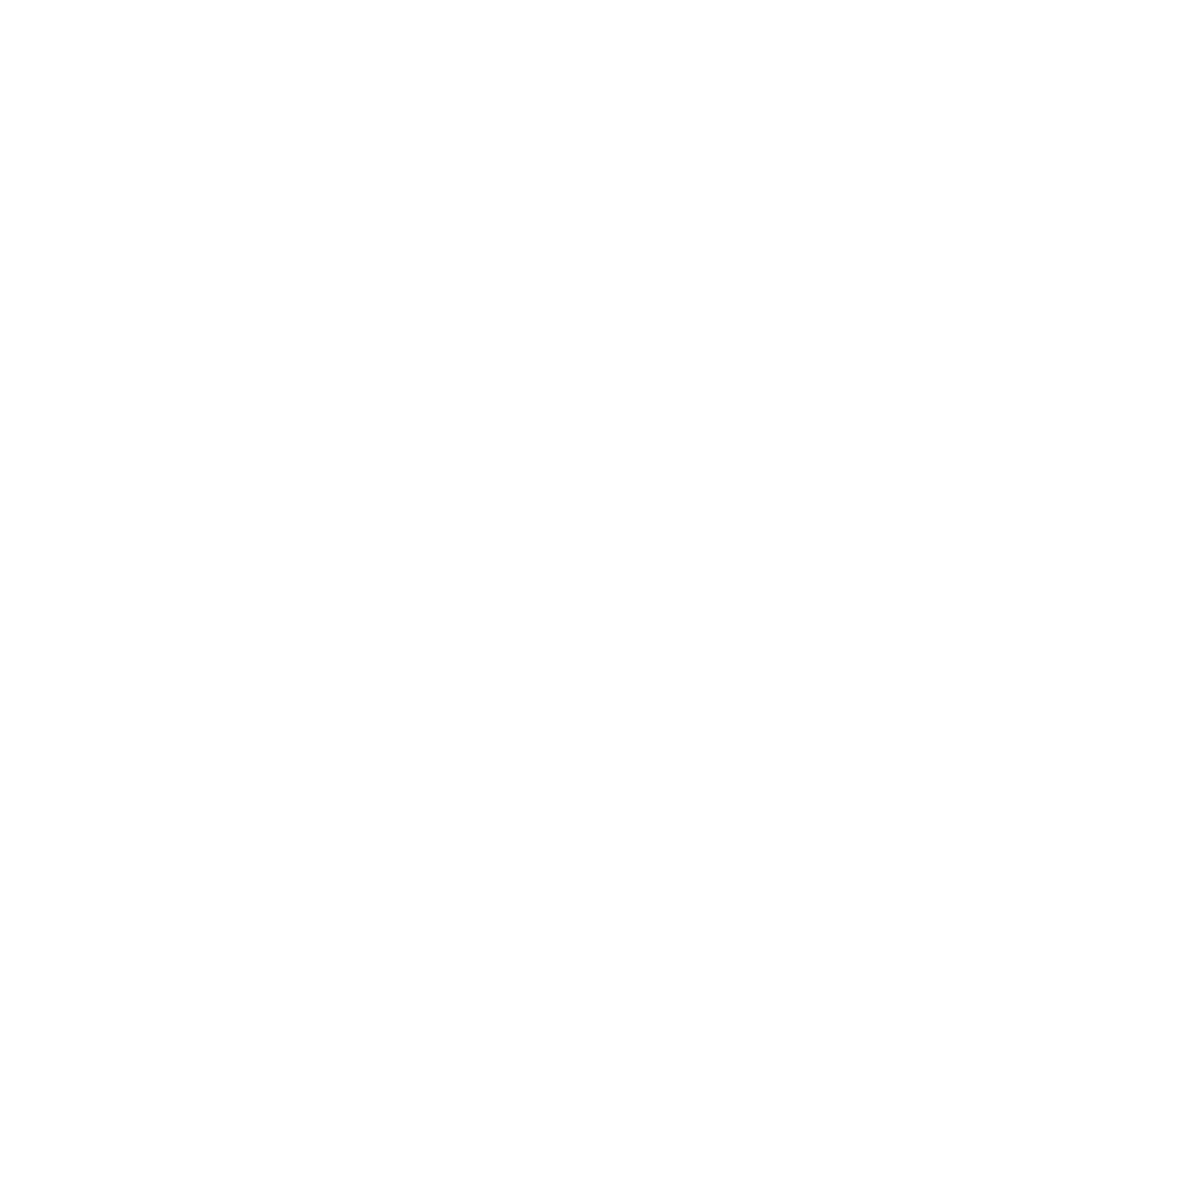

In [7]:
webpage.content

- this document is in bytes format

In [8]:
type(webpage.content)

bytes

- To convert it into HTML format, we use beautifull soup

In [9]:
# Soup object containing all data
soup = BeautifulSoup(webpage.content, 'html.parser')

<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>
<script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>
<title>Larsen &amp; Toubro Limited Reviews by 16752 Employees 2024 | AmbitionBox</title><meta content="2024 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" n
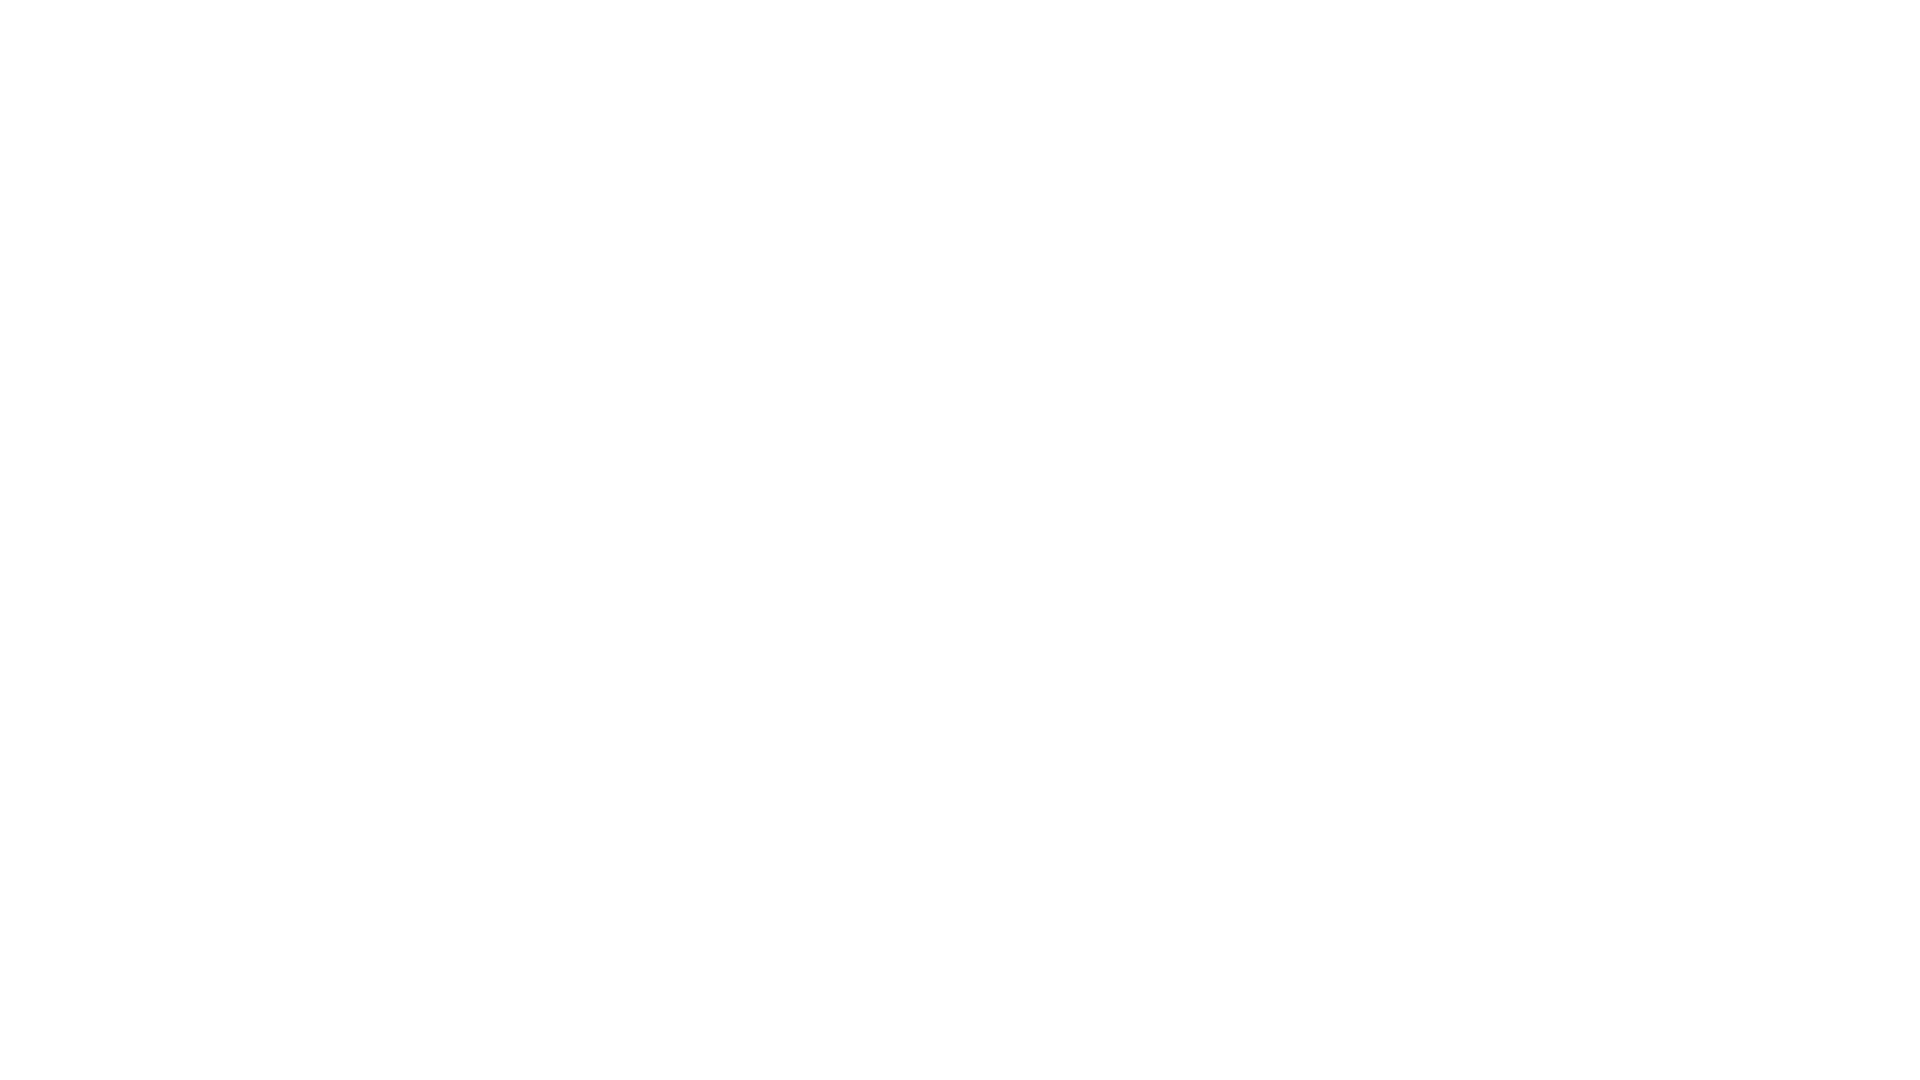
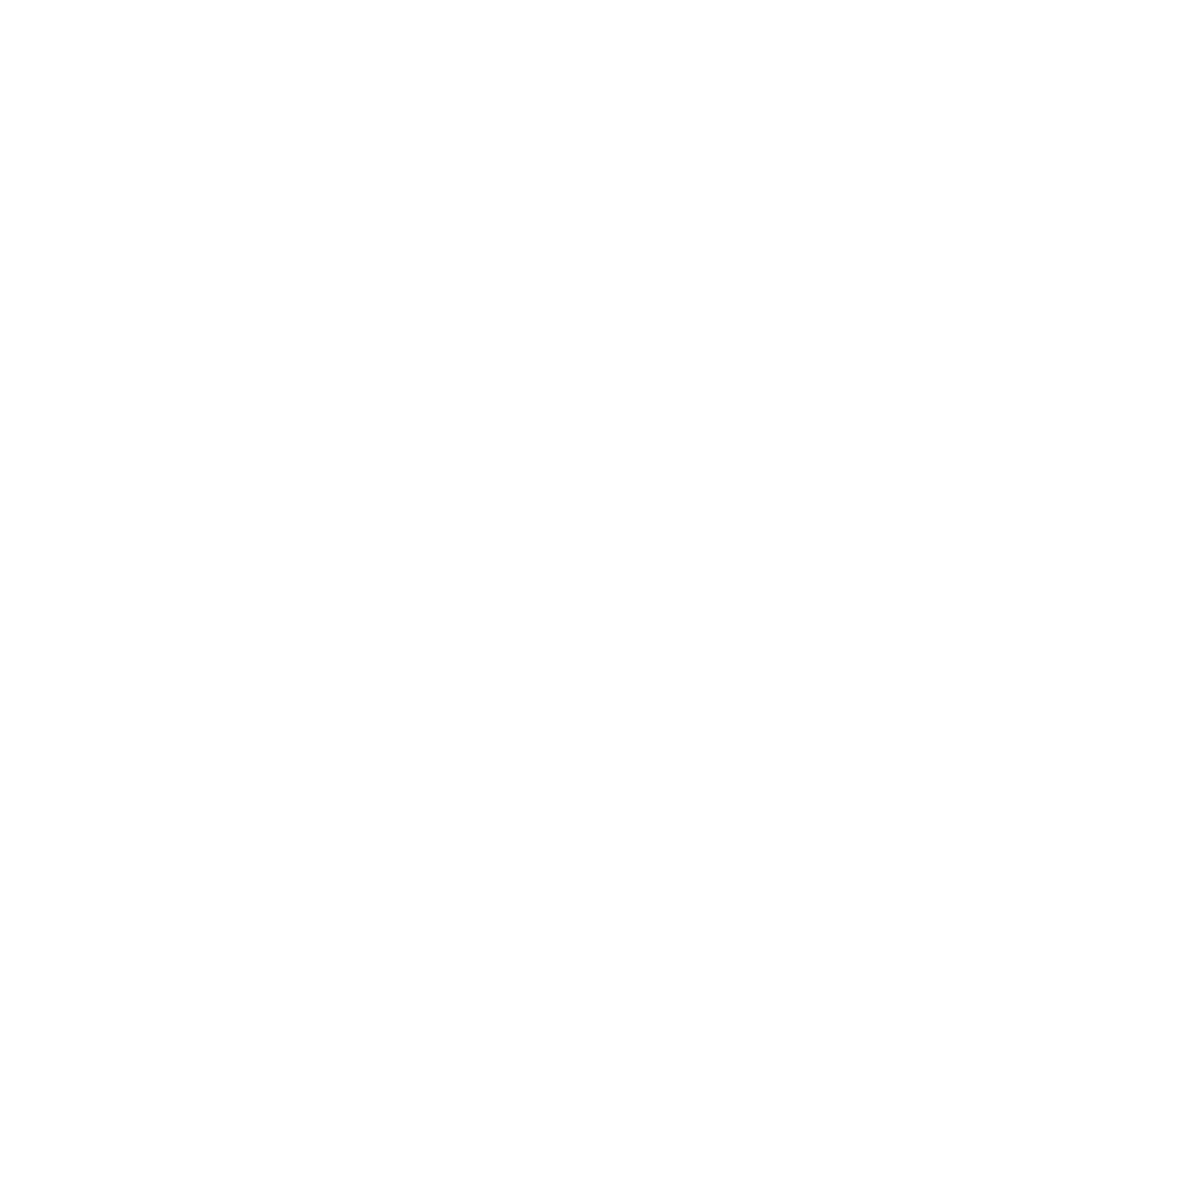

In [10]:
soup

- this is html doc converted to html file

- there is a tag, and then there is an element inside the tag

- Now, we extract the reviews

In [11]:
soup.find_all("div", attrs={"itemprop":"reviewBody"})

[<div class="review-body" itemprop="reviewBody"><h3 class="input-fields sub-heading">Likes</h3> <p class="body-medium overflow-wrap">I would say people must work in L&amp;T once to know that it could not be worse elsewhere. 
 A bulletproof system to suck every bit of thrill of employee and flourish their wealth. </p> <h3 class="input-fields sub-heading">Dislikes</h3> <p class="body-medium overflow-wrap">Managers often state we want obident not intelligent employees. They are happy to reward people who are yes boss type, will not question the practice and punish many thinking engineers as they question. 
 Bosses in L&amp;T have built a fortress of favourism within group and made a practice to deprive others. 
 The senior management praise<span class="hide">people for staying long, coming to office on weekend ignoring personal committment, family matters, physical and mental wellbeing, which  ensures obedience. 
 L&amp;T marks my maximum loss to monetary and moral wellbeing. 
 Adding mor

In [12]:
len(soup.find_all("div", attrs={"itemprop":"reviewBody"}))

10

In [13]:
soup.find_all("div", attrs={"itemprop":"reviewBody"})[0].text

'Likes I would say people must work in L&T once to know that it could not be worse elsewhere. \nA bulletproof system to suck every bit of thrill of employee and flourish their wealth.  Dislikes Managers often state we want obident not intelligent employees. They are happy to reward people who are yes boss type, will not question the practice and punish many thinking engineers as they question. \nBosses in L&T have built a fortress of favourism within group and made a practice to deprive others. \nThe senior management praisepeople for staying long, coming to office on weekend ignoring personal committment, family matters, physical and mental wellbeing, which  ensures obedience. \nL&T marks my maximum loss to monetary and moral wellbeing. \nAdding more to injury, managers in L&T use abusive language and loves to make personal remarks also... Never found such a culture in any other company....Read More Work Details   Work days:\xa0Alternate Saturday off\n\t\t\t\t\t\t\t\t\t (Strict Timing

- We can use find on top of find (Or find inside find)

In [14]:
soup.find_all("div", attrs={"itemprop":"reviewBody"})[0].find_all("p", attrs={"class":"body-medium overflow-wrap"})

[<p class="body-medium overflow-wrap">I would say people must work in L&amp;T once to know that it could not be worse elsewhere. 
 A bulletproof system to suck every bit of thrill of employee and flourish their wealth. </p>,
 <p class="body-medium overflow-wrap">Managers often state we want obident not intelligent employees. They are happy to reward people who are yes boss type, will not question the practice and punish many thinking engineers as they question. 
 Bosses in L&amp;T have built a fortress of favourism within group and made a practice to deprive others. 
 The senior management praise<span class="hide">people for staying long, coming to office on weekend ignoring personal committment, family matters, physical and mental wellbeing, which  ensures obedience. 
 L&amp;T marks my maximum loss to monetary and moral wellbeing. 
 Adding more to injury, managers in L&amp;T use abusive language and loves to make personal remarks also... Never found such a culture in any other company

In [15]:
soup.find_all("div", attrs={"itemprop":"reviewBody"})[0].find_all("p", attrs={"class":"body-medium overflow-wrap"})[0].text

'I would say people must work in L&T once to know that it could not be worse elsewhere. \nA bulletproof system to suck every bit of thrill of employee and flourish their wealth. '

In [16]:
soup.find_all("div", attrs={"itemprop":"reviewBody"})[0].find_all("p", attrs={"class":"body-medium overflow-wrap"})[1].text

'Managers often state we want obident not intelligent employees. They are happy to reward people who are yes boss type, will not question the practice and punish many thinking engineers as they question. \nBosses in L&T have built a fortress of favourism within group and made a practice to deprive others. \nThe senior management praisepeople for staying long, coming to office on weekend ignoring personal committment, family matters, physical and mental wellbeing, which  ensures obedience. \nL&T marks my maximum loss to monetary and moral wellbeing. \nAdding more to injury, managers in L&T use abusive language and loves to make personal remarks also... Never found such a culture in any other company....Read More'

In [17]:
soup.find_all("span", attrs={"class":"avg-rating bold-Labels"})

[<span class="avg-rating bold-Labels">2.0</span>,
 <span class="avg-rating bold-Labels">4.0</span>,
 <span class="avg-rating bold-Labels">5.0</span>,
 <span class="avg-rating bold-Labels">4.0</span>,
 <span class="avg-rating bold-Labels">3.0</span>,
 <span class="avg-rating bold-Labels">3.0</span>,
 <span class="avg-rating bold-Labels">5.0</span>,
 <span class="avg-rating bold-Labels">2.0</span>,
 <span class="avg-rating bold-Labels">5.0</span>,
 <span class="avg-rating bold-Labels">4.0</span>]

In [74]:
soup.find_all("span", attrs={"class":"avg-rating bold-Labels"})[0].text

'2.0'

In [18]:
len(soup.find_all("span", attrs={"class":"avg-rating bold-Labels"}))

10

In [66]:
soup.find_all("h2", attrs={"itemprop":"name"})

[<h2 class="bold-title-s review-title" itemprop="name">Assistant Manager <!-- --> <span class="text-small">in </span>
 							Kolkata <span class="lower-case">(working remotely)</span></h2>,
 <h2 class="bold-title-s review-title" itemprop="name">Plant Machinery Engineer <!-- --> <span class="text-small">in </span>
 							Bhubaneswar <!-- --></h2>,
 <h2 class="bold-title-s review-title" itemprop="name">Industrial Relations and Administration Manager <!-- --> <span class="text-small">in </span>
 							Rawatbhata <!-- --></h2>,
 <h2 class="bold-title-s review-title" itemprop="name">Assistant General Manager <!-- --> <span class="text-small">in </span>
 							Jharsuguda <!-- --></h2>,
 <h2 class="bold-title-s review-title" itemprop="name">Senior Surveyor <!-- --> <span class="text-small">in </span>
 							New Delhi <!-- --></h2>,
 <h2 class="bold-title-s review-title" itemprop="name">Assistant Manager <!-- --> <span class="text-small">in </span>
 							Mumbai <!-- --></h2>,
 <h2 class

In [67]:
len(soup.find_all("h2", attrs={"itemprop":"name"}))

10

In [70]:
soup.find_all("h2", attrs={"itemprop":"name"})[7].text

'Executive Accountant  in \n\t\t\t\t\t\t\tBangalore / Bengaluru '

In [ ]:
# ?page=

In [57]:
URL_1 = "https://www.ambitionbox.com/reviews/larsen-and-toubro-limited-reviews" + "?page=" + "998"

In [58]:
# now, we get web-page
webpage_1 = requests.get(URL_1, headers=HEADER)

In [59]:
webpage_1

<Response [200]>

In [60]:
# Soup object containing all data
soup_1 = BeautifulSoup(webpage_1.content, 'html.parser')

In [61]:
len(soup_1.find_all("div", attrs={"itemprop":"reviewBody"}))

10

In [ ]:
soup_1.find_all("div", attrs={"itemprop":"reviewBody"})[3].find_all("p", attrs={"class":"body-medium overflow-wrap"})[0].text

In [ ]:
soup_1.find_all("div", attrs={"itemprop":"reviewBody"})[3].find_all("p", attrs={"class":"body-medium overflow-wrap"})[1].text

'As you  nown 12 hours duty so pain full duty'

In [63]:
soup_1.find_all("span", attrs={"class":"avg-rating bold-Labels"})

[<span class="avg-rating bold-Labels">3.0</span>,
 <span class="avg-rating bold-Labels">5.0</span>,
 <span class="avg-rating bold-Labels">3.0</span>,
 <span class="avg-rating bold-Labels">4.0</span>,
 <span class="avg-rating bold-Labels">5.0</span>,
 <span class="avg-rating bold-Labels">4.0</span>,
 <span class="avg-rating bold-Labels">4.0</span>,
 <span class="avg-rating bold-Labels">3.0</span>,
 <span class="avg-rating bold-Labels">4.0</span>,
 <span class="avg-rating bold-Labels">5.0</span>]